In [7]:
from tensorflow import keras
from keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# create ImageDataGenerator for data augmentation

In [8]:
augment_data = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical")
])

2023-06-29 19:00:45.194038: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-29 19:00:45.194470: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
"""
train_data = train_gen.flow_from_directory('./ecosystems/train/',
                                           batch_size=8, 
                                           target_size=(300,300),
                                           color_mode='rgb',
                                           class_mode='categorical',
                                           shuffle=True
                                          )                                          
"""
train_data = image_dataset_from_directory('./ecosystems/train/',
                                           batch_size=8, 
                                           image_size=(300,300),
                                           shuffle=True
                                          )

validation_data = image_dataset_from_directory('./ecosystems/val/', 
                                                batch_size=8, 
                                                image_size=(300,300),
                                               )
test_data = image_dataset_from_directory('./ecosystems/test/',
                                          batch_size=8, 
                                          image_size=(300,300),
                                         )

Found 2000 files belonging to 2 classes.
Found 658 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


In [10]:
from keras import Sequential
from keras import layers
model = Sequential()
model.add(augment_data)
model.add(layers.Conv2D(8, (3,3), activation='relu', input_shape=(300,300,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model

In [11]:
from keras.optimizers.rmsprop import RMSprop
from keras.optimizers.adam import Adam
epochs = 2
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [12]:
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=validation_data,
                    validation_batch_size=8
                   )

Epoch 1/2


2023-06-29 19:00:51.734804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]
2023-06-29 19:00:51.735348: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2000]
	 [[{{node Placeholder/_4}}]]


250/250 [==============================] - ETA: 0s - loss: 14.1292 - accuracy: 0.8990

2023-06-29 19:01:12.327180: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [658]
	 [[{{node Placeholder/_4}}]]
2023-06-29 19:01:12.327403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [658]
	 [[{{node Placeholder/_4}}]]


250/250 [==============================] - 22s 84ms/step - loss: 14.1292 - accuracy: 0.8990 - val_loss: 0.5971 - val_accuracy: 0.9195
Epoch 2/2
250/250 [==============================] - 21s 83ms/step - loss: 0.4768 - accuracy: 0.9015 - val_loss: 0.3954 - val_accuracy: 0.9210


# graph accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


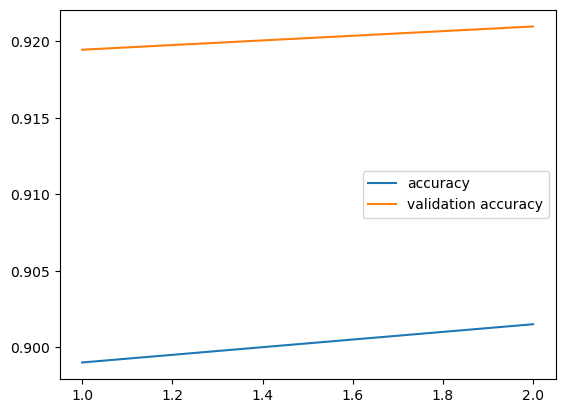

In [13]:
import matplotlib.pyplot as plt

x = np.linspace(1,epochs,epochs)
print(history.history.keys())

acc_plt, = plt.plot(x, history.history['accuracy'])
val_acc_plt, = plt.plot(x, history.history['val_accuracy'])
plt.legend([acc_plt, val_acc_plt],['accuracy', 'validation accuracy'])

# graph loss

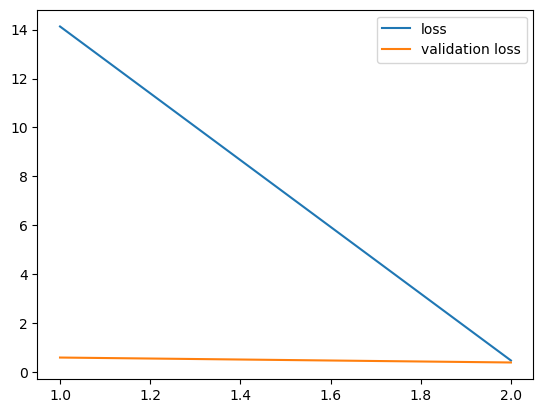

In [14]:
loss_plt, = plt.plot(x,history.history['loss'])
val_loss_plt, = plt.plot(x,history.history['val_loss'])
plt.legend([loss_plt, val_loss_plt],['loss','validation loss'])

In [15]:
model.evaluate(test_data)

 7/50 [===>..........................] - ETA: 0s - loss: 0.5688 - accuracy: 0.9107

2023-06-29 19:01:44.689297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [400]
	 [[{{node Placeholder/_4}}]]
2023-06-29 19:01:44.689524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [400]
	 [[{{node Placeholder/_4}}]]


50/50 [==============================] - 1s 18ms/step - loss: 0.4241 - accuracy: 0.9075


[0.4241165816783905, 0.9075000286102295]